In [53]:
import sys
print(sys.executable)

/workspace/miluser/Mitsuharu_2002/mitsuharu-12-02/bin/python


In [54]:
import torch
import sys
import os

print("Python:", sys.executable)
print("CUDA available:", torch.cuda.is_available())
print("GPU name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "None")
print("Realpath:", os.path.realpath(sys.executable))
print(torch.__file__)
print(torch.version.cuda)
print(torch.backends.cudnn.version())

device = torch.device("cuda:1")





Python: /workspace/miluser/Mitsuharu_2002/mitsuharu-12-02/bin/python
CUDA available: True
GPU name: NVIDIA RTX A6000
Realpath: /opt/conda/bin/python3.11
/workspace/miluser/Mitsuharu_2002/mitsuharu-12-02/lib/python3.11/site-packages/torch/__init__.py
12.4
90100


In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [56]:
import sys
print(sys.executable)

import os
os.environ["TRANSFORMERS_NO_TF"] = "1"




/workspace/miluser/Mitsuharu_2002/mitsuharu-12-02/bin/python


In [57]:
import os

import pprint
from langchain_community.vectorstores import FAISS
from langchain_huggingface import HuggingFaceEmbeddings


from langchain_core.documents import Document


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [58]:
df = pd.read_csv("/workspace/miluser/Mitsuharu_2002/csv_data/letsPredictTacticsName.csv")
df3_tactics = pd.read_csv("/workspace/miluser/Mitsuharu_2002/csv_data/TacticsDataset_aug_multilabel_all_clean.csv")

In [59]:
!nvidia-smi


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Sun Dec 14 13:08:38 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 555.42.06              Driver Version: 555.42.06      CUDA Version: 12.5     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA RTX A6000               Off |   00000000:03:00.0 Off |                  Off |
| 35%   64C    P2             49W /  300W |     743MiB /  49140MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [60]:
df

,ID,Domain,act_Technique ID,act_TacticsName,act_Technique Name,Sentences,test_or_train,Predicted_ATT&CK ID_original,Predicted_TacticsName
0,1,Enterprise,T1543,Persistence:Privilege Escalation,Create or Modify System Process: Windows Service,Carbanak malware installs itself as a service ...,train,NaN,NaN
1,2,Enterprise,T1562,Defense Evasion,Impair Defenses: Disable or Modify System Fire...,Carbanak may use netsh to add local firewall r...,train,NaN,NaN
2,3,Enterprise,T1036,Defense Evasion,Masquerading: Masquerade Task or Service,Carbanak has copied legitimate service names t...,train,NaN,NaN
3,4,Enterprise,T1036,Defense Evasion,Masquerading: Match Legitimate Name or Location,"Carbanak has named malware ""svchost.exe,"" whic...",train,NaN,NaN
4,5,Enterprise,T1588,Resource Development,Obtain Capabilities: Tool,Carbanak has obtained and used open-source too...,train,NaN,NaN
...,...,...,...,...,...,...,...,...,...
8382,8383,Enterprise,T1573,Command and Control,Encrypted Channel: Symmetric Cryptography,NETEAGLE will decrypt resources it downloads w...,train,NaN,NaN
8383,8384,Enterprise,T1041,Exfiltration,Exfiltration Over C2 Channel,NETEAGLE is capable of reading files over the ...,train,NaN,NaN
8384,8385,Enterprise,T1083,Discovery,File and Directory Discovery,NETEAGLE allows adversaries to enumerate and m...,train,NaN,NaN
8385,8386,Enterprise,T1057,Discovery,Process Discovery,NETEAGLE can send process listings over the C2...,test,T1057,NaN


In [61]:
df3_tactics

,Tactics,Sentence
0,Discovery,Explosive is a custom-made remote access tool ...
1,Defense Evasion,Explosive is a custom-made remote access tool ...
2,Collection,Explosive is a custom-made remote access tool ...
3,Credential Access,Explosive is a custom-made remote access tool ...
4,Command and Control,Explosive is a custom-made remote access tool ...
...,...,...
10508,Lateral Movement,There is debate over the extent of overlap bet...
10509,Command and Control,There is debate over the extent of overlap bet...
10510,Command and Control,Twitoor is a dropper application capable of re...
10511,Defense Evasion,"Cobalt Strike is a commercial, full-featured, ..."


In [62]:
len(set(df["act_Technique ID"]))

50

In [63]:
df = df[["ID", "act_Technique ID", "act_TacticsName", "Sentences", "test_or_train",]]

In [64]:
# train, test = train_test_split(df, test_size=0.2, random_state=0)
# train, test = train_test_split(df, test_size=0.2, random_state=0)
import pandas as pd
import numpy as np

# test_or_train が "train" の行だけ
train = df3_tactics
# test_or_train が "test" の行だけ
test = df[df["test_or_train"] == "test"].copy()



In [65]:
len(test)

1678

In [66]:
test

,ID,act_Technique ID,act_TacticsName,Sentences,test_or_train
14,15,T1005,Collection,"Frankenstein has enumerated hosts via Empire, ...",test
20,21,T1588,Resource Development,Frankenstein has obtained and used Empire to d...,test
22,23,T1566,Initial Access,Frankenstein has used spearphishing emails to ...,test
23,24,T1057,Discovery,"Frankenstein has enumerated hosts, looking to ...",test
29,30,T1204,Execution,Frankenstein has used trojanized Microsoft Wor...,test
...,...,...,...,...,...
8368,8369,T1562,Defense Evasion,TYPEFRAME can open the Windows Firewall on the...,test
8369,8370,T1070,Defense Evasion,TYPEFRAME can delete files off the system.[1],test
8381,8382,T1059,Execution,NETEAGLE allows adversaries to execute shell c...,test
8385,8386,T1057,Discovery,NETEAGLE can send process listings over the C2...,test


In [67]:
train

,Tactics,Sentence
0,Discovery,Explosive is a custom-made remote access tool ...
1,Defense Evasion,Explosive is a custom-made remote access tool ...
2,Collection,Explosive is a custom-made remote access tool ...
3,Credential Access,Explosive is a custom-made remote access tool ...
4,Command and Control,Explosive is a custom-made remote access tool ...
...,...,...
10508,Lateral Movement,There is debate over the extent of overlap bet...
10509,Command and Control,There is debate over the extent of overlap bet...
10510,Command and Control,Twitoor is a dropper application capable of re...
10511,Defense Evasion,"Cobalt Strike is a commercial, full-featured, ..."


In [68]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer("sentence-transformers/multi-qa-MiniLM-L6-cos-v1")

docs = []
texts = []
embeddings_list = []

# 1. 埋め込みモデル（ここでの embeddings は「モデル」ね！）
embeddings = HuggingFaceEmbeddings(
    model_name="sentence-transformers/multi-qa-MiniLM-L6-cos-v1"
    # 再現実験で SecureBERT を使うなら:
    # model_name="ehsanaghaei/SecureBERT"
)

for index, row in train.iterrows():
    text = row["Sentence"]
    emb = model.encode(text, convert_to_numpy=True)

    # ✅ embedding は Document に入れない
    doc = Document(
        page_content=text,
        metadata={"Tactics": row["Tactics"],
        },
    )

    docs.append(doc)
    texts.append(text)
    embeddings_list.append(emb)

print("docs:", len(docs))
print("embeddings_list:", len(embeddings_list))
print("texts:", len(texts))


docs: 10513
embeddings_list: 10513
texts: 10513


In [69]:
docs[0]

Document(metadata={'Tactics': 'Discovery'}, page_content='Explosive is a custom-made remote access tool used by the group Volatile Cedar.')

In [70]:
import faiss
import numpy as np

# ① ベクトル次元
d = embeddings_list[0].shape[0]  # 384 次元とか

# ② FAISS index を作成（L2距離）
index = faiss.IndexFlatL2(d)

# ③ numpy 配列にまとめる
emb_matrix = np.vstack(embeddings_list).astype('float32')

# ④ インデックスへ追加
index.add(emb_matrix)

print("FAISS に追加された件数:", index.ntotal)



FAISS に追加された件数: 10513


In [71]:
# 類似検索テスト
query = model.encode(test.iloc[0]["Sentences"], convert_to_numpy=True).astype('float32')

k = 45
distances, indices = index.search(query.reshape(1, -1), k)

print(indices)
print(distances)


[[ 4992  4993  4994  4995  4996  4997  4998  4999  5000  5001  3218  3219
   3220  3221  3222  3223  3224  3225  3226  3227  3198  3199  3200  3201
   3202  3203  3204  3205  3206  3207 10369 10370 10371 10372 10373 10374
  10375 10376 10377 10378 10379  9885  9886  9887  9888]]
[[1.183469  1.183469  1.183469  1.183469  1.183469  1.183469  1.183469
  1.183469  1.183469  1.183469  1.2021406 1.2021406 1.2021406 1.2021406
  1.2021406 1.2021406 1.2021406 1.2021406 1.2021406 1.2021406 1.2063429
  1.2063429 1.2063429 1.2063429 1.2063429 1.2063429 1.2063429 1.2063429
  1.2063429 1.2063429 1.25781   1.25781   1.25781   1.25781   1.25781
  1.25781   1.25781   1.25781   1.25781   1.25781   1.25781   1.3216776
  1.3216776 1.3216776 1.3216776]]


In [72]:
import re

def split_tactics(s: str):
    if s is None:
        return set()
    # ; 区切り想定（念のため余計な空白も吸収）
    parts = [p.strip() for p in re.split(r"[:]", str(s)) if p.strip()]
    return set(parts)

Ks = [1, 5, 10, 15] + list(range(20, 60, 5))
results = {}

for K in Ks:
    recall_hit = 0

    for _, row in test.iterrows():
        query_vec = model.encode(row["Sentences"], convert_to_numpy=True).astype("float32")
        distances, indices = index.search(query_vec.reshape(1, -1), K)

        retrieved = [docs[i].metadata["Tactics"] for i in indices[0]]
        retrieved_set = set([t.strip() for t in retrieved if t is not None])

        gold_set = split_tactics(row["act_TacticsName"])

        # 1つでも被ったらヒット
        if gold_set & retrieved_set:
            recall_hit += 1

    recall_k = recall_hit / len(test)
    results[K] = recall_k
    print(f"Recall@{K:3d} = {recall_k:.4f}")


Recall@  1 = 0.2688
Recall@  5 = 0.7902
Recall@ 10 = 0.9750
Recall@ 15 = 0.9917
Recall@ 20 = 0.9946
Recall@ 25 = 0.9958
Recall@ 30 = 0.9976
Recall@ 35 = 0.9994
Recall@ 40 = 0.9994
Recall@ 45 = 0.9994
Recall@ 50 = 0.9994
Recall@ 55 = 0.9994


# 生成テスト用（TacticsのBERT)

In [74]:
from collections import Counter
import numpy as np

K = 45  # さっきと同じK

# ① number件目のテストデータを取り出す
number = 5
a = number - 1
row = test.iloc[a]

query_text = row["Sentences"]
true_tid   = row["act_Technique ID"]
true_tac   = row["act_TacticsName"]   # 正解Tactics

# ② ベクトル化して近傍検索
query_vec = model.encode(query_text, convert_to_numpy=True).astype("float32")
distances, indices = index.search(query_vec.reshape(1, -1), K)

# ③ 上位K件の Tactics を取り出す
top_k_indices = indices[0]
top_k_dists   = distances[0]

retrieved_tactics = [docs[i].metadata["Tactics"] for i in top_k_indices]

# もし "Tactics" が "A;B" みたいな形の可能性があるなら分割した版も作れる
# split_tactics = [[t.strip() for t in str(docs[i].metadata["Tactics"]).split(";") if t.strip()]
#                  for i in top_k_indices]

# ④ 出力
print(f"===== {number}件目のチェック =====")
print(f"Technique ID (真値) : {true_tid}")
print(f"Tactics (真値)      : {true_tac}")
print()
print(f"入力CTI文:\n{query_text}\n")
print(f"上位 {K} 件の候補 Tactics:")

for rank, (idx_i, dist, tac) in enumerate(zip(top_k_indices, top_k_dists, retrieved_tactics), start=1):
    print(f"  {rank}. Tactics={tac}  (doc_index={idx_i}, dist={dist:.4f})")

print()
print(f"真の Tactics が候補に含まれているか？ -> {true_tac in retrieved_tactics}")


===== 5件目のチェック =====
Technique ID (真値) : T1204
Tactics (真値)      : Execution

入力CTI文:
Frankenstein has used trojanized Microsoft Word documents sent via email, which prompted the victim to enable macros.[1]

上位 45 件の候補 Tactics:
  1. Tactics=Discovery  (doc_index=6605, dist=0.6305)
  2. Tactics=Defense Evasion  (doc_index=6606, dist=0.6305)
  3. Tactics=Impact  (doc_index=6607, dist=0.6305)
  4. Tactics=Command and Control  (doc_index=6608, dist=0.6305)
  5. Tactics=Execution  (doc_index=6609, dist=0.6305)
  6. Tactics=Persistence  (doc_index=6610, dist=0.6305)
  7. Tactics=Privilege Escalation  (doc_index=6611, dist=0.6305)
  8. Tactics=Execution  (doc_index=10208, dist=0.8470)
  9. Tactics=Discovery  (doc_index=10209, dist=0.8470)
  10. Tactics=Persistence  (doc_index=10210, dist=0.8470)
  11. Tactics=Privilege Escalation  (doc_index=10211, dist=0.8470)
  12. Tactics=Defense Evasion  (doc_index=10212, dist=0.8470)
  13. Tactics=Command and Control  (doc_index=10213, dist=0.8470)
  14.

In [75]:
from langchain_community.vectorstores import FAISS as LCFAISS
db = LCFAISS.from_documents(docs, embeddings)
db.save_local("TTPHunter_50_TTPs_andTactics_3")

In [76]:
from langchain_huggingface import HuggingFaceEmbeddings
from langchain_community.vectorstores import FAISS as LCFAISS

# 1. 保存時と同じモデル名で embeddings（モデル）を復元
embeddings = HuggingFaceEmbeddings(
    model_name="sentence-transformers/multi-qa-MiniLM-L6-cos-v1"
    # SecureBERT 使って保存したなら、ここも同じ名前にする
)

# 2. ローカルからベクターストアをロード
db = LCFAISS.load_local(
    "TTPHunter_50_TTPs_andTactics_3",
    embeddings,
    allow_dangerous_deserialization=True
)

print("loaded FAISS index:", db)

docs = db.similarity_search("test", k=1)
doc = docs[0]
print(doc.metadata)  # ここに "Tactics" が見えてたらOK


loaded FAISS index: <langchain_community.vectorstores.faiss.FAISS object at 0x7f0be10486d0>
{'Tactics': 'Discovery'}


In [77]:
test

,ID,act_Technique ID,act_TacticsName,Sentences,test_or_train
14,15,T1005,Collection,"Frankenstein has enumerated hosts via Empire, ...",test
20,21,T1588,Resource Development,Frankenstein has obtained and used Empire to d...,test
22,23,T1566,Initial Access,Frankenstein has used spearphishing emails to ...,test
23,24,T1057,Discovery,"Frankenstein has enumerated hosts, looking to ...",test
29,30,T1204,Execution,Frankenstein has used trojanized Microsoft Wor...,test
...,...,...,...,...,...
8368,8369,T1562,Defense Evasion,TYPEFRAME can open the Windows Firewall on the...,test
8369,8370,T1070,Defense Evasion,TYPEFRAME can delete files off the system.[1],test
8381,8382,T1059,Execution,NETEAGLE allows adversaries to execute shell c...,test
8385,8386,T1057,Discovery,NETEAGLE can send process listings over the C2...,test


### Few-Shot Learning

In [78]:
import sys
print(sys.executable)


/workspace/miluser/Mitsuharu_2002/mitsuharu-12-02/bin/python


In [26]:
!pwd

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


/workspace/miluser/Mitsuharu_2002


# llama 読み込み

In [79]:
# !pip install llama-cpp-python

from llama_cpp import Llama

llm = Llama.from_pretrained(
	repo_id="unsloth/Llama-3.3-70B-Instruct-GGUF",
	filename="Llama-3.3-70B-Instruct-Q5_K_M.gguf",
	cache_dir = "/workspace/miluser/Mitsuharu_2002/llama_cache",
    n_ctx=4000,
    n_gpu_layers=-1,          # できるだけ GPU に載せる
    main_gpu=0,               # 小さいテンソルは GPU0 で処理
    tensor_split=[0.5, 0.5],  # 大きいテンソルを GPU0/1 に 50:50 で分割
    verbose=False,             # ロードログを出す
)

llm.create_chat_completion(
	messages = [
		{
			"role": "user",
			"content": "What is the capital of France?"
		}
	]
)


llama_context: n_ctx_per_seq (4000) < n_ctx_train (131072) -- the full capacity of the model will not be utilized


{'id': 'chatcmpl-8a4a9be7-fe23-416b-9094-d2a20e426a0c',
 'object': 'chat.completion',
 'created': 1765685579,
 'model': '/workspace/miluser/Mitsuharu_2002/llama_cache/models--unsloth--Llama-3.3-70B-Instruct-GGUF/snapshots/8f14c5c5d06fca109ff16f94496147a8479711de/./Llama-3.3-70B-Instruct-Q5_K_M.gguf',
 'choices': [{'index': 0,
   'message': {'role': 'assistant',
    'content': 'The capital of France is Paris.'},
   'logprobs': None,
   'finish_reason': 'stop'}],
 'usage': {'prompt_tokens': 42, 'completion_tokens': 7, 'total_tokens': 49}}

In [81]:
import re
from collections import Counter
from llama_cpp import Llama   # もう import 済みなら不要

# ★ llm はループの外で1回だけ作る（今までどおり）
# llm = Llama.from_pretrained(...)

predicted_tactics = []
K_NEIGHBORS = 55      # MiniLM + FAISS での近傍文数（例の数）
K_TACTICS   = 5       # Llama に渡す Tactics 候補の種類数

for index, row in test.iterrows():
    text_to_predict = row["Sentences"]
    ids = row["ID"]

    # 1. MiniLM + FAISS で K_NEIGHBORS 件取得
    search_results = db.similarity_search_with_score(text_to_predict, k=K_NEIGHBORS)

    # 2. 近傍から Tactics を集計（例として使うラベルも Tactics にする）
    tactics_list = []
    example_lines = []

    for doc, score in search_results:
        # 閾値フィルタ（元のコードと同じく score < 2 のものだけ例に採用）
        if score >= 2:
            continue

        raw_tac = doc.metadata.get("Tactics", "")
        # "Defense Evasion;Persistence" みたいな場合は一旦先頭だけを主ラベルにする
        primary_tac = str(raw_tac).split(";")[0].strip()
        if not primary_tac:
            continue

        tactics_list.append(primary_tac)

        example_lines.append(
            "\nText:" + doc.page_content.lower().strip() +
            "\nSimilarity:" + str(score) + "\n" +
            "Tactic:" + primary_tac + "\n"
        )

    # 例が全然集まらなかったときの保険（スキップするか、適当に continue）
    if not example_lines or not tactics_list:
        predicted_tactics.append("")
        print("actual:", row["act_TacticsName"], ", predicted: (no examples)")
        continue

    examples_block = "".join(example_lines)

    # 3. 出現回数から Tactics 候補を決める
    counter = Counter(tactics_list)
    candidate_tactics = [t for t, _ in counter.most_common(K_TACTICS)]

    # 4. プロンプト生成（★ここが大きく変更ポイント）
    #    - 目的: 入力CTI文を「候補Tacticsのどれか1つ」に分類させる
    #    - 出力は候補の中からただ1つの Tactics 名だけ
    candidate_list_str = "\n".join(f"- {t}" for t in candidate_tactics)

    prompt = (
        "You are a cybersecurity expert.\n"
        "Your task is to classify the last sentence of 'InputText' into exactly ONE ATT&CK Tactic.\n"
        "You are given example sentences with their similarity scores and their correct Tactic labels.\n"
        "A smaller similarity score means the example sentence is more similar to InputText.\n\n"
        "Allowed Tactics:\n"
        f"{candidate_list_str}\n\n"
        "Rules:\n"
        "- You MUST answer with exactly ONE Tactic label.\n"
        "- The output MUST be exactly one of the Allowed Tactics listed above.\n"
        "- Do NOT output any ATT&CK Technique IDs (like T1082).\n"
        "- Do NOT output '?', explanations, or anything else.\n"
        "- If you are unsure, choose the most plausible Tactic from the Allowed Tactics based on the examples.\n\n"
        "Examples:\n"
        f"{examples_block}\n"
        f"InputText:{text_to_predict.lower().strip()}\n"
        "Tactic:"
    )

    out = llm.create_chat_completion(
        messages=[
            {
                "role": "user",
                "content": prompt,
            }
        ],
        temperature=0.0,
        max_tokens=32,  # Tactics名がそのまま返ればOKなので小さめで十分
    )

    raw = out["choices"][0]["message"]["content"].strip()

    # 5. 出力から Tactics を決定
    #  - まず1行目を取る
    cand = raw.splitlines()[0].strip()

    # モデルがちゃんと候補どおり出してくれればそのまま使う
    if cand in candidate_tactics:
        predicted_tac = cand
    else:
        # 念のため、候補の中で「部分一致」するものがあればそれを採用
        matched = None
        for t in candidate_tactics:
            if t.lower() in cand.lower():
                matched = t
                break
        predicted_tac = matched if matched is not None else ""

    predicted_tactics.append(predicted_tac)
    print("id:", ids, ", act_TacticsName:", row["act_TacticsName"], ", predicted_Tactics_Name:", predicted_tac)

print("len(test)             =", len(test))
print("len(predicted_tactics) =", len(predicted_tactics))


id: 15 , act_TacticsName: Collection , predicted_Tactics_Name: Execution
id: 21 , act_TacticsName: Resource Development , predicted_Tactics_Name: Execution
id: 23 , act_TacticsName: Initial Access , predicted_Tactics_Name: Collection
id: 24 , act_TacticsName: Discovery , predicted_Tactics_Name: Discovery
id: 30 , act_TacticsName: Execution , predicted_Tactics_Name: Execution
id: 32 , act_TacticsName: Execution , predicted_Tactics_Name: Discovery
id: 33 , act_TacticsName: Discovery , predicted_Tactics_Name: Discovery
id: 34 , act_TacticsName: Discovery , predicted_Tactics_Name: Discovery
id: 39 , act_TacticsName: Persistence:Privilege Escalation , predicted_Tactics_Name: Persistence
id: 40 , act_TacticsName: Execution , predicted_Tactics_Name: Command and Control
id: 43 , act_TacticsName: Collection , predicted_Tactics_Name: Discovery
id: 45 , act_TacticsName: Exfiltration , predicted_Tactics_Name: Command and Control
id: 49 , act_TacticsName: Defense Evasion , predicted_Tactics_Name: D

In [82]:
# 予測結果をDataFrameに追加
test["Predicted"] = predicted_tactics

# CSVとして保存
test.to_csv("20251213_result.csv", index=False, encoding="utf-8")

### Evaluate

In [ ]:
import re
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def split_tactics(s):
    if s is None:
        return []
    return [p.strip() for p in re.split(r"[:]", str(s)) if p.strip()]

# ここで cleaned_labels を作る
cleaned_labels = [str(x).replace("Classification:", "").strip() for x in predicted_tactics]

y_true_raw = test["act_TacticsName"].values
y_pred_raw = cleaned_labels

y_true_single = np.array([
    pred if pred in split_tactics(true) else "__MIS__"
    for true, pred in zip(y_true_raw, y_pred_raw)
])
y_pred_single = np.array(y_pred_raw)

accuracy = accuracy_score(y_true_single, y_pred_single)
precision = precision_score(y_true_single, y_pred_single, average="weighted", zero_division=0)
recall = recall_score(y_true_single, y_pred_single, average="weighted", zero_division=0)
f1 = f1_score(y_true_single, y_pred_single, average="weighted", zero_division=0)

print(f"Accuracy:  {accuracy}")
print(f"Precision: {precision}")
print(f"Recall:    {recall}")
print(f"F1 Score:  {f1}")


Accuracy:  0.6609058402860548
Precision: 0.47152275162999335
Recall:    0.6609058402860548
F1 Score:  0.5434001567341132


: 

In [ ]:
# import pandas as pd

# # ① CSV を読み込み
# df_base = pd.read_csv("/workspace/miluser/Mitsuharu_2002/csv_data/TTPHunter_dataset.csv")              # Domain, Technique ID, Technique Name, Sentences
# df_pred = pd.read_csv("/workspace/miluser/Mitsuharu_2002/predicted_Tactics_70B_1678.csv")     # Technique ID, Tactics Name, Sentences, Predicted

# # （もし念のためヘッダに余計な空白がありそうなら）
# df_base.columns = df_base.columns.str.strip()
# df_pred.columns = df_pred.columns.str.strip()

# # ② Predicted だけ使う（＋キーになる Sentences）
# df_pred_small = df_pred[["Sentences", "Predicted"]]

# # ③ Sentences をキーに結合（LEFT JOIN）
# df_merged = df_base.merge(df_pred_small, on="Sentences", how="left")

# # ④ 保存
# df_merged.to_csv("TTPHunter_with_Predicted.csv", index=False)


In [37]:
["\nClassification:"+str(score)+"\n" for doc, score in search_results]

['\nClassification:1.4865143\n',
 '\nClassification:1.6369226\n',
 '\nClassification:1.6448\n',
 '\nClassification:1.6713446\n',
 '\nClassification:1.6736209\n',
 '\nClassification:1.676918\n',
 '\nClassification:1.6792228\n',
 '\nClassification:1.6910262\n',
 '\nClassification:1.6973819\n',
 '\nClassification:1.6999131\n',
 '\nClassification:1.7092636\n',
 '\nClassification:1.7314875\n',
 '\nClassification:1.7424253\n',
 '\nClassification:1.759018\n',
 '\nClassification:1.7921451\n',
 '\nClassification:1.8126066\n',
 '\nClassification:1.8142612\n',
 '\nClassification:1.8462461\n',
 '\nClassification:1.8507403\n',
 '\nClassification:1.8576546\n',
 '\nClassification:1.866282\n',
 '\nClassification:1.8664744\n',
 '\nClassification:1.8670653\n',
 '\nClassification:1.8717663\n',
 '\nClassification:1.8766123\n',
 '\nClassification:1.8772757\n',
 '\nClassification:1.9072158\n',
 '\nClassification:1.9091657\n',
 '\nClassification:1.9159868\n',
 '\nClassification:1.9184682\n',
 '\nClassificati

以下追加分（混合行列）

In [38]:
import sys
print(sys.executable)

!pip install --upgrade pip


/workspace/miluser/Mitsuharu_2002/mitsuharu-12-02/bin/python


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


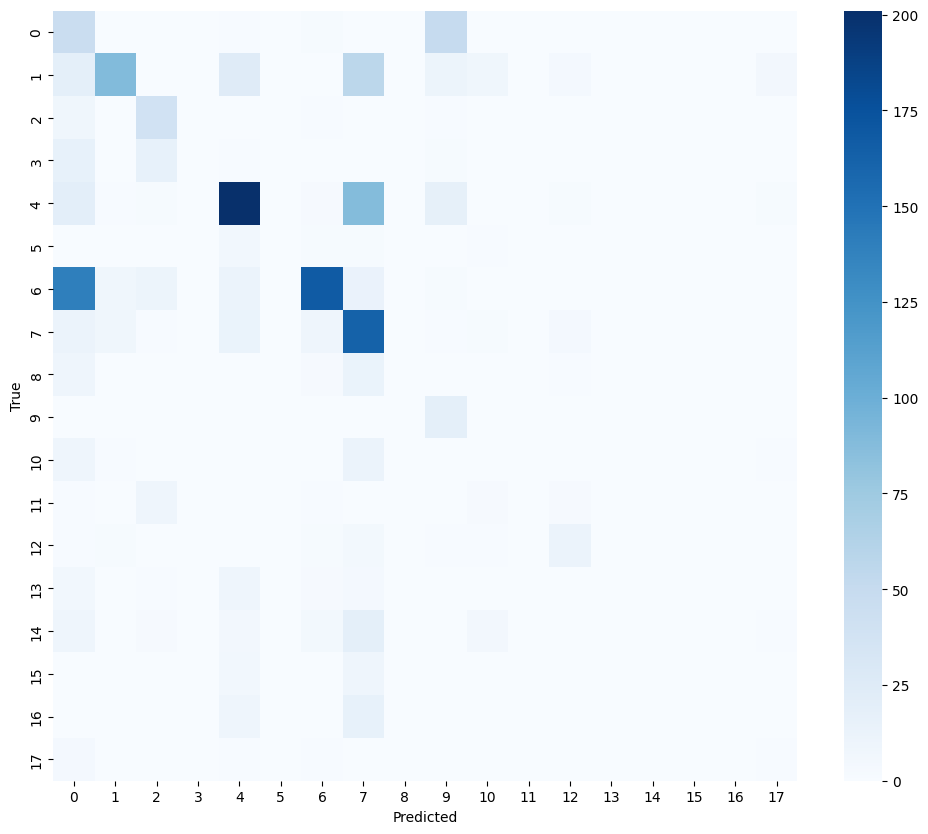

Execution               402
Collection              304
Defense Evasion         292
Discovery               201
Command and Control     109
Exfiltration            106
Credential Access        83
Impact                   41
Persistence              40
Lateral Movement         26
                         22
Initial Access           21
Reconnaissance           13
Resource Development     11
Privilege Escalation      7
Name: count, dtype: int64


In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred, labels=sorted(list(set(y_true))))
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=False, cmap="Blues", xticklabels=True, yticklabels=True)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

import pandas as pd

print(pd.Series(y_pred).value_counts())



In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))


                                                                 precision    recall  f1-score   support

                                                                      0.00      0.00      0.00         0
                                                     Collection       0.15      0.46      0.23       102
                                            Command and Control       0.82      0.39      0.52       231
                                              Credential Access       0.47      0.80      0.59        49
                                   Credential Access:Collection       0.00      0.00      0.00        35
                                                Defense Evasion       0.69      0.54      0.61       371
                                      Defense Evasion:Discovery       0.00      0.00      0.00        12
                                                      Discovery       0.84      0.46      0.59       366
                                                      

/workspace/miluser/Mitsuharu_2002/mitsuharu-12-02/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/workspace/miluser/Mitsuharu_2002/mitsuharu-12-02/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/workspace/miluser/Mitsuharu_2002/mitsuharu-12-02/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

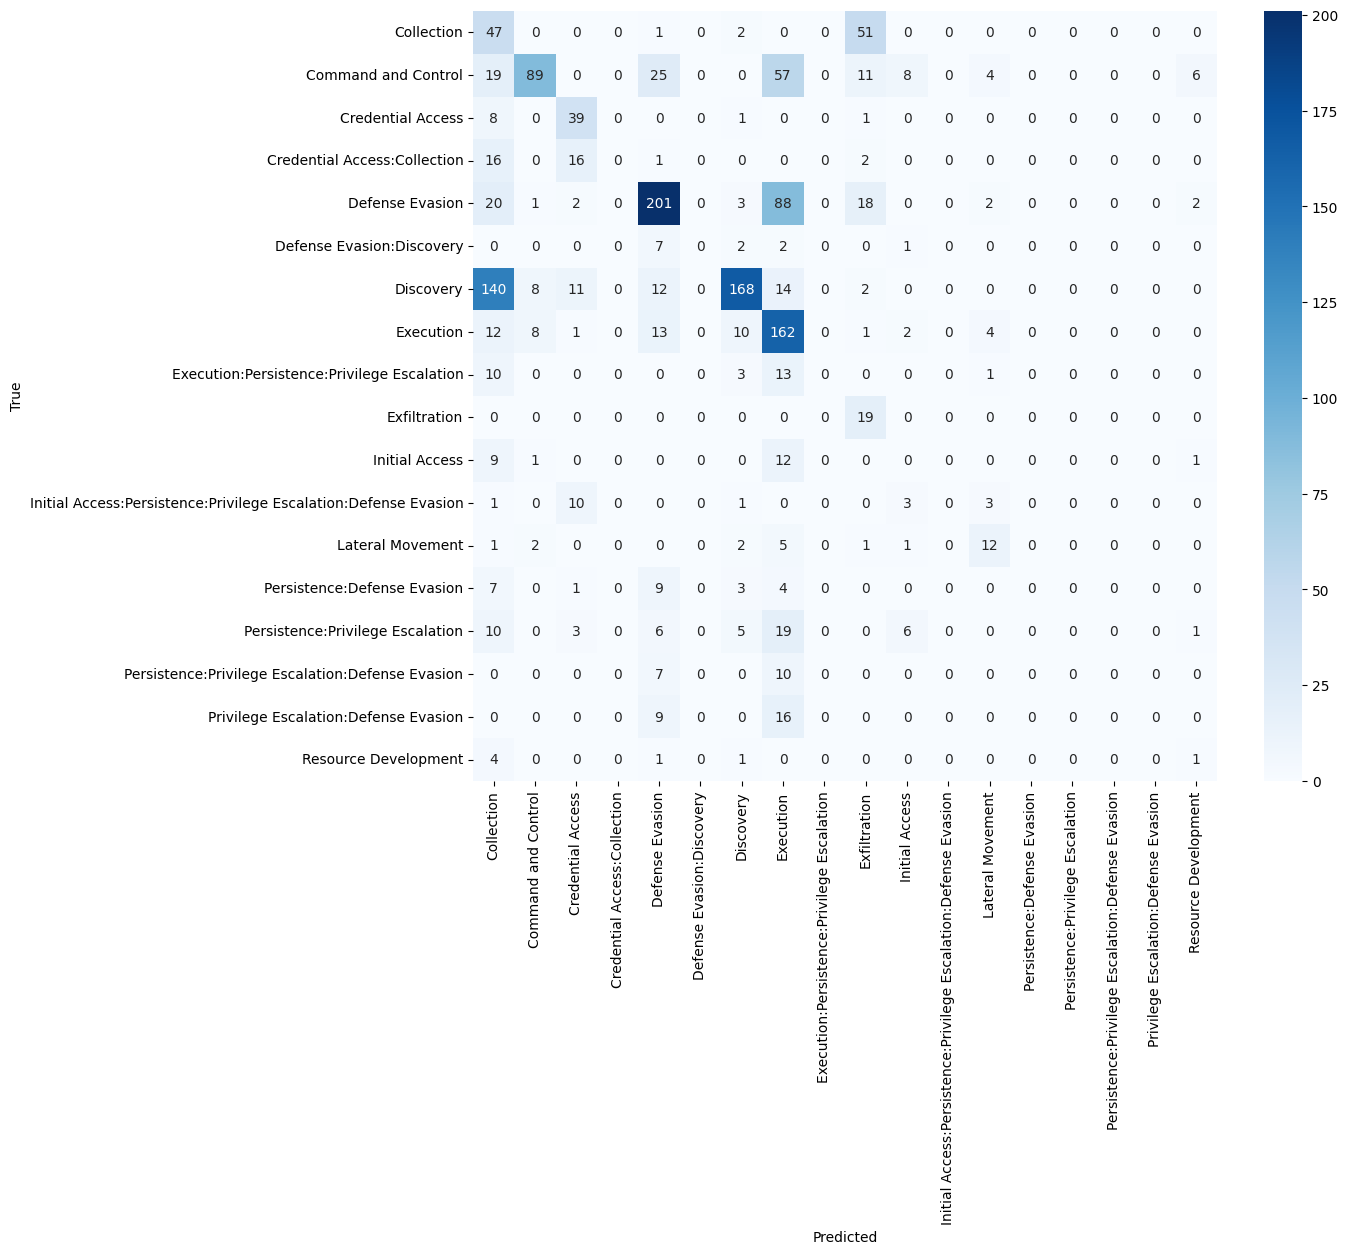

Execution               402
Collection              304
Defense Evasion         292
Discovery               201
Command and Control     109
Exfiltration            106
Credential Access        83
Impact                   41
Persistence              40
Lateral Movement         26
                         22
Initial Access           21
Reconnaissance           13
Resource Development     11
Privilege Escalation      7
Name: count, dtype: int64


: 

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# ラベルを揃えておく
labels = sorted(list(set(y_true)))

cm = confusion_matrix(y_true, y_pred, labels=labels)

plt.figure(figsize=(12, 10))
sns.heatmap(
    cm,
    annot=True,      # ★ 数字を表示
    fmt="d",         # ★ 整数表示（floatなら ".2f" とか）
    cmap="Blues",
    xticklabels=labels,
    yticklabels=labels
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print(pd.Series(y_pred).value_counts())


In [ ]:
for t,p,txt in zip(y_true, y_pred, test["text"]):
    if t != p:
        print("True:", t)
        print("Pred:", p)
        print("Text:", txt)
        print("-" * 50)



### Few Shot learning 2

In [ ]:
# Aggregate predictions using majority voting
from collections import Counter

def majority_voting(predictions):
    count = Counter(predictions)
    return count.most_common(1)[0][0]

In [ ]:
import random

def create_prompt(template, search_results, text_to_predict):
    xs = ["\nText:"+ doc.page_content.lower()+"\nClassification:"+doc.metadata['TTP_ID'] for doc, _ in search_results]
    xs = ''.join(xs)+"\nText:"+ text_to_predict.lower() +"\nClassification:"
    return template + xs

def split_list(lst):
    random.shuffle(lst)  # Shuffle the list to ensure randomness
    n = len(lst)
    third = n // 3
    remainder = n % 3

    # Determine the splitting points
    split1 = third
    split2 = third * 2

    if remainder == 1:
        split1 += 1
    elif remainder == 2:
        split1 += 1
        split2 += 1

    # Split the list
    first_third = lst[:split1]
    second_third = lst[split1:split2]
    third_third = lst[split2:]

    return first_third, second_third, third_third



predicted_labels = []
# Iterating over the DataFrame row by row
for index, row in test.iterrows():
    #print(f"Index: {index}")
    text_to_predict = row["Sentences"]

    search_results = db.similarity_search_with_score(text_to_predict, k=150)

    template1 = "Your task is to classify the last sentence of 'Text' based on the provided examples. Each example shows a sentence and its corresponding classification label. Use these examples to determine the correct classification for the given text. Return only the classification label starting with 'T'.\n"
    template2 = "Please classify the last sentence of 'Text' based on the provided examples. Each example shows a sentence and its classification label. Use the patterns from these examples to classify the given text correctly. Return only the classification label starting with 'T'.\n"
    template3 = "Your task is to determine the classification of the last sentence of 'Text' using the provided examples. Each example pairs a sentence with its classification label. Analyze these examples to classify the given text. Output only the classification label starting with 'T'.\n"

    ## Split the list
    first_part, second_part, third_part = split_list(search_results)

    
    prompt1 = create_prompt(template1, first_part, text_to_predict)
    prompt2 = create_prompt(template2, second_part, text_to_predict)
    prompt3 = create_prompt(template3, third_part, text_to_predict)
    
    # Collect predictions
    prompts = [prompt1, prompt2, prompt3]
    predictions = []
    
    for prompt in prompts:
        
        prediction = llm.invoke(prompt).content
        predictions.append(prediction)

    print(predictions)
    
    
    final_prediction = majority_voting(predictions)
    #print("Final Prediction:", final_prediction)
    predicted_labels.append(final_prediction)
    print("actual:", row["Technique ID"], ", predicted:", final_prediction)

### Evaluate

In [ ]:
cleaned_labels = [label.replace('Classification:', '') for label in predicted_labels]

# Example vectors containing strings
y_true = test["Technique ID"].values#["cat", "dog", "fish", "cat", "dog"]
#y_true = train_data.Key
y_pred = cleaned_labels#.values#["cat", "dog", "cat", "cat", "dog"]

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate precision
precision = precision_score(y_true, y_pred, average='weighted')
print(f"Precision: {precision}")

# Calculate recall
recall = recall_score(y_true, y_pred, average='weighted')
print(f"Recall: {recall}")

# Calculate F1 score
f1 = f1_score(y_true, y_pred, average='weighted')
print(f"F1 Score: {f1}")

temperature:0, k=45

Accuracy: 0.9523809523809523
Precision: 0.9761904761904762
Recall: 0.9523809523809523
F1 Score: 0.9603174603174602

temperature:1, k=45

Accuracy: 0.9285714285714286
Precision: 0.9642857142857143
Recall: 0.9285714285714286
F1 Score: 0.9365079365079364

### V2 - SecureBERT Embeddings

In [ ]:
### embedding
model2 = "ehsanaghaei/SecureBERT"
embeddings2 = HuggingFaceEmbeddings(model_name = model2)

docs2 = []
for index, row in train.iterrows():
    doc = Document(page_content=row["Sentences"], metadata={"TTP_ID": row["Technique ID"]})
    docs2.append(doc)

print(len(docs2))

In [ ]:
db2 = FAISS.from_documents(docs2, embeddings2)


In [ ]:
from langchain_openai import OpenAIEmbeddings

embeddings3 = OpenAIEmbeddings(
    model="text-embedding-3-large",
    # With the `text-embedding-3` class
    # of models, you can specify the size
    # of the embeddings you want returned.
    # dimensions=1024
)

db3 = FAISS.from_documents(docs2, embeddings3)


In [ ]:
db2

In [ ]:
from langchain_openai import ChatOpenAI

# Choose the LLM that will drive the agent
llm = ChatOpenAI(model="gpt-4o", temperature=0)###, model_kwargs={"top_p": 0.0})
#llm = ChatOpenAI(model="o1-mini", temperature=1)
#llm = ChatOpenAI(model="chatgpt-4o-latest", temperature=0)

#llm.invoke(prompt)

scores_list = []
predicted_labels = []
# Iterating over the DataFrame row by row
for index, row in test.iterrows():
    #print(f"Index: {index}")
    text_to_predict = row["Sentences"]

    ##### Prompt 1
    search_results = db3.similarity_search_with_score(text_to_predict, k=45)

    
    xs = ["\nText:"+ doc.page_content.lower().strip()+"\nSimilarity:"+ str(score) +"\nClassification:"+doc.metadata['TTP_ID']+"\n" for doc, score in search_results if score < 2]
    #xs = ["\nText:'"+ doc.page_content.lower().strip()+"'\nSimilarity:"+ str(score) +"\nClassification:"+doc.metadata['TTP_ID']+"\n" for doc, score in search_results]
    

    xs = ''.join(xs)+"\nInputText:"+ text_to_predict.lower().strip() +"\nClassification:"
    xs = "Your task is to classify the last sentence of 'InputText' based on the provided examples. Each example shows a sentence, inverse similarity to InputText (the lower the better), and its corresponding classification label. Use these examples to determine the correct classification for the given text. Return only the classification label starting with 'T'.\n" + xs
    #xs = "You are an expert in text classification. Below are examples of texts with their classifications based on their similarity to the 'InputText'. For the 'InputText' provided, choose the most appropriate classification based on the examples given. Only return the classification label (e.g., TXXXX). Use the closest similarity as the primary criterion for classification.\n\n" + xs
    #####
    [scores_list.append(score) for doc, score in search_results]
    ### search
    '''
    search_results = db.similarity_search_with_score(text_to_predict, k=55)
    xs = ["\n"+ "Example "+ str(i) +":\nText:"+ doc.page_content.lower()+"\nClassification:"+doc.metadata['TTP_ID']+"\n" for i, (doc, _) in enumerate(search_results)]
    ##xs = ["\nText:"+" ".join(str(doc.page_content).lower().split())+"\nClassification:"+doc.metadata['TTP_ID'] for doc, _ in search_results]
    

    ### mmr search
    #search_results = db.max_marginal_relevance_search(text_to_predict,k=45, fetch_k=250)
    #xs = ["\nText:"+doc.page_content.lower()+"\nClassification:"+doc.metadata['TTP_ID'] for doc in search_results]

    
    xs += "\n\nNote: The examples show a pattern where certain attack behaviors correspond to specific classification labels. Use this pattern recognition to classify the new text accurately.\nNow, classify the following text:\n"
    xs = ''.join(xs)+"\nText:"+ text_to_predict.lower() +"\nClassification:"
    #xs = "Your task is to classify the last sentence of 'Text' based on the provided examples. Each example shows a sentence and its corresponding classification label. Use these examples to determine the correct classification for the given text. Return only the classification label starting with 'T'.\n" + xs
    xs = "Your task is to classify the last sentence of 'Text' based on the diverse examples provided below. Learn the patterns from these examples to make accurate classifications. Output only the classification label beginning with 'T'.\n\nExamples:\n" + xs
    '''
    #print(xs)
    prompt = xs#prompt#"Write a poem about a cat chasing a butterfly."
    result = llm.invoke(prompt)
    predicted_label = result.content
    
    #predicted_label = most_common_ttp_id
    #print(predicted_label)
    predicted_labels.append(predicted_label)
    print("actual:", row["Technique ID"], ", predicted:", predicted_label)
    #break

### No LLM Call

In [ ]:
from langchain_openai import ChatOpenAI

# Choose the LLM that will drive the agent
llm = ChatOpenAI(model="gpt-4o", temperature=0)###, model_kwargs={"top_p": 0.0})
#llm = ChatOpenAI(model="chatgpt-4o-latest", temperature=0)

#llm.invoke(prompt)

scores_list = []
predicted_labels = []
# Iterating over the DataFrame row by row
for index, row in test.iterrows():
    #print(f"Index: {index}")
    text_to_predict = row["Sentences"]

    ##### Prompt 1
    search_results = db2.similarity_search_with_score(text_to_predict, k=45)

    
    xs = ["\nText:"+ doc.page_content.lower().strip()+"\nSimilarity:"+ str(score) +"\nClassification:"+doc.metadata['TTP_ID']+"\n" for doc, score in search_results if score < 2]
    #xs = ["\nText:'"+ doc.page_content.lower().strip()+"'\nSimilarity:"+ str(score) +"\nClassification:"+doc.metadata['TTP_ID']+"\n" for doc, score in search_results]
    

    xs = ''.join(xs)+"\nInputText:"+ text_to_predict.lower().strip() +"\nClassification:"
    xs = "Your task is to classify the last sentence of 'InputText' based on the provided examples. Each example shows a sentence, inverse similarity to InputText (the lower the better), and its corresponding classification label. Use these examples to determine the correct classification for the given text. Return only the classification label starting with 'T'.\n" + xs
    #xs = "You are an expert in text classification. Below are examples of texts with their classifications based on their similarity to the 'InputText'. For the 'InputText' provided, choose the most appropriate classification based on the examples given. Only return the classification label (e.g., TXXXX). Use the closest similarity as the primary criterion for classification.\n\n" + xs
    #####
    [scores_list.append(score) for doc, score in search_results]
    
    #print(xs)
    #prompt = xs#prompt#"Write a poem about a cat chasing a butterfly."
    #result = llm.invoke(prompt)
    #predicted_label = result.content
    
    #predicted_label = most_common_ttp_id
    #print(predicted_label)
    #predicted_labels.append(predicted_label)
    #print("actual:", row["Technique ID"], ", predicted:", predicted_label)
    #break

In [ ]:
### Evaluate

In [ ]:
cleaned_labels = [label.replace('Classification:', '') for label in predicted_labels]

# Example vectors containing strings
y_true = test["Technique ID"].values#["cat", "dog", "fish", "cat", "dog"]
#y_true = train_data.Key
y_pred = cleaned_labels#.values#["cat", "dog", "cat", "cat", "dog"]

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate precision
precision = precision_score(y_true, y_pred, average='weighted')
print(f"Precision: {precision}")

# Calculate recall
recall = recall_score(y_true, y_pred, average='weighted')
print(f"Recall: {recall}")

# Calculate F1 score
f1 = f1_score(y_true, y_pred, average='weighted')
print(f"F1 Score: {f1}")

In [ ]:
# Secure Bert Embeddings - 
Accuracy: 0.9523809523809523
Precision: 0.9880952380952381
Recall: 0.9523809523809523
F1 Score: 0.9619047619047618

In [ ]:
from statistics import mean
print(max(scores_list))
print(mean(scores_list))
print(min(scores_list))

In [ ]:
from statistics import mean
print(max(scores_list))
print(mean(scores_list))
print(min(scores_list))

In [ ]:
# Find incorrectly classified labels
incorrect_classifications = []
for index, (true_label, pred_label) in enumerate(zip(y_true, y_pred)):
    if true_label != pred_label:
        incorrect_classifications.append({
            'Index': index,
            'True Label': true_label,
            'Predicted Label': pred_label
        })

# Output the results
if incorrect_classifications:
    print("Incorrectly Classified Labels:")
    for item in incorrect_classifications:
        print(f"Index {item['Index']}: True Label = {item['True Label']}, Predicted Label = {item['Predicted Label']}")
else:
    print("All labels are correctly classified.")

In [ ]:
print(xs)

In [ ]:
train["Technique ID"].value_counts()["T1036"]#.head()

### SImilarity Investigation

In [ ]:
score_list = []
very_similar_string = "kerrdown can use a vbs base64 decoder function published by motobit"
totaly_wrong_string = "we have a nice weather today"
search_results2 = db2.similarity_search_with_score(very_similar_string, k=45)
[score_list.append(score) for doc, score in search_results2]
["\nText:"+ doc.page_content.lower().strip()+"\nSimilarity:"+ str(score) +"\nClassification:"+doc.metadata['TTP_ID']+"\n" for doc, score in search_results2 if score < 2]
#score_list

### V3

In [ ]:
# Choose the LLM that will drive the agent
llm = ChatOpenAI(model="gpt-4o", temperature=0)###, model_kwargs={"top_p": 0.0})
#llm = ChatOpenAI(model="chatgpt-4o-latest", temperature=0)

#llm.invoke(prompt)

def predict_label(text_to_predict):
    ##### Prompt 1
    search_results = db2.similarity_search_with_score(text_to_predict, k=45)

    
    xs = ["\nText:"+ doc.page_content.lower().strip()+"\nSimilarity:"+ str(score) +"\nClassification:"+doc.metadata['TTP_ID']+"\n" for doc, score in search_results if score < 2]
    #xs = ["\nText:'"+ doc.page_content.lower().strip()+"'\nSimilarity:"+ str(score) +"\nClassification:"+doc.metadata['TTP_ID']+"\n" for doc, score in search_results]
    

    xs = ''.join(xs)+"\nInputText:"+ text_to_predict.lower().strip() +"\nClassification:"
    xs = """You are a MITRE ATT&CK TTP classification expert.
    Your task is to classify the 'InputText' based on the provided examples below.
    Each example shows a sentence, inverse similarity to InputText (the lower the better),
    and its corresponding classification label starting with 'T'.
    Use these examples to determine the correct classification for the given text (InputText).
    If 'InputText' is completely not related to any of the provided examples, return class 'T0000'.
    To determine if the 'InputText' is not related to the given examples, you can use the 'Similarity' propery of the examples.
    Low 'Similarity' values indicate the high similarity in strings.
    Return only the classification label starting with 'T' or 'T0000' if you found no appropriate class for 'InputText'.\n""" + xs
    #xs = "You are an expert in text classification. Below are examples of texts with their classifications based on their similarity to the 'InputText'. For the 'InputText' provided, choose the most appropriate classification based on the examples given. Only return the classification label (e.g., TXXXX). Use the closest similarity as the primary criterion for classification.\n\n" + xs
    #####
    
    #print(xs)
    prompt = xs#prompt#"Write a poem about a cat chasing a butterfly."
    result = llm.invoke(prompt)
    predicted_label = result.content
    return predicted_label


scores_list = []
predicted_labels = []
# Iterating over the DataFrame row by row
for index, row in test.iterrows():
    #print(f"Index: {index}")
    text_to_predict = row["Sentences"]

    predicted_label = predict_label(text_to_predict)
    
    #predicted_label = most_common_ttp_id
    #print(predicted_label)
    predicted_labels.append(predicted_label)
    print("actual:", row["Technique ID"], ", predicted:", predicted_label)
    #break

In [ ]:
print(xs)

In [ ]:
cleaned_labels = [label.replace('Classification:', '') for label in predicted_labels]

# Example vectors containing strings
y_true = test["Technique ID"].values#["cat", "dog", "fish", "cat", "dog"]
#y_true = train_data.Key
y_pred = cleaned_labels#.values#["cat", "dog", "cat", "cat", "dog"]

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate precision
precision = precision_score(y_true, y_pred, average='weighted')
print(f"Precision: {precision}")

# Calculate recall
recall = recall_score(y_true, y_pred, average='weighted')
print(f"Recall: {recall}")

# Calculate F1 score
f1 = f1_score(y_true, y_pred, average='weighted')
print(f"F1 Score: {f1}")

In [ ]:
predict_label("We have a beautiful wether today")

### Text to Predict

In [ ]:
text_to_predict = """
sofacy uses dealerschoice to target european government agency
robert falcone	by robert falcone
march 15, 2018 at 1:00 pm
category: unit 42 tags: dealerschoice, european government agency, sofacy summary back in october 2016, unit 42 published an initial analysis on a flash exploitation framework used by the sofacy threat group called dealerschoice. the attack consisted of microsoft word delivery documents that contained adobe flash objects capable of loading additional malicious flash objects embedded in the file or directly provided by a command and control server. sofacy continued to use dealerschoice throughout the fall of 2016, which we also documented in our december 2016 publication discussing sofacy s larger campaign. on march 12 and march 14, we observed the sofacy group carrying out an attack on a european government agency involving an updated variant of dealerschoice. the updated dealerschoice documents used a similar process to obtain a malicious flash object from a c2 server, but the inner mechanics of the flash object contained significant differences in comparison to the original samples we analyzed. one of the differences was a particularly clever evasion technique: to our knowledge this has never been observed in use. with the previous iterations of dealerschoice samples, the flash object would immediately load and begin malicious tasks. in the march attacks, the flash object is only loaded if the user scrolls through the entire content of the delivery document and views the specific page the flash object is embedded on. also, dealerschoice requires multiple interactions with an active c2 server to successfully exploit an end system. the overall process to result in a successful exploitation is: user must open the microsoft word email attachment
user must scroll to page three of the document, which will run the dealerschoice flash object
the flash object must contact an active c2 server to download an additional flash object containing exploit code
the initial flash object must contact the same c2 server to download a secondary payload
victim host must have a vulnerable version of flash installed the attack the attack involving this updated variant of dealerschoice was targeting a european government organization. the attack relied on a spear-phishing email with a subject of defence & security 2018 conference agenda that had an attachment with a filename of defence & security 2018 conference . the attached document contains a conference agenda that the sofacy group appears to have copied directly from the website for the underwater defence & security 2018 conference here. opening the attached defence & security 2018 conference file does not immediately run malicious code to exploit the system. instead, the user must scroll to the third page of the document, which will load a flash object that contains actionscript that will attempt to exploit the user s system to install a malicious payload. the flash object embedded within this delivery document is a variant of an exploit tool that we call dealerschoice. this suggests that the sofacy group is confident that the targeted individuals would be interested enough in the content to peruse through it. we analyzed the document to determine the reason that the malicious flash object only ran when the user scrolled to the third page. according to the file, the dealerschoice loader swf exists after the covert-shores- image file within the delivery document. this image file exists on the third page of the document, so the user would have to scroll down in the document to this third page to get the swf file to run. the user may not notice the flash object on the page, as word displays it as a tiny black box in the document, as seen in figure 1. this is an interesting anti-sandbox technique, as it requires human interaction prior to the document exhibiting any malicious activity. updated dealerschoice this dealerschoice flash object shares a similar process to previous variants; however, it appears that the sofacy actors have made slight changes to its internal code. also, it appears that the actors used actionscript from an open source video player called f4player , which is freely available on github with the following description: f4player is an open source flash (as3) video player and library project. it is so small that it is only 10kb (with skin file) and totally free under gpl license. the sofacy developer modified the f4player s actionscript to include additional code to load an embedded flash object. the additions include code to decrypt an embedded flash object and an event handler that calls a newly added function ( skinevent2 ) that plays the decrypted object, as seen in the code snippet below: the above code allows dealerschoice to load a second swf object, specifically loading it with an argument that includes a c2 url of hxxp://ndpmedia24[.]com/0pq6m4f.m3u8 . the embedded swf extracts the domain from the c2 url passed to it and uses it to craft a url to get the server s file in order to obtain permissions to load additional flash objects from the c2 domain. the actionscript relies on event listeners to call specific functions when the event event.complete is triggered after successful http requests are issued to the c2 server. the event handlers call functions with the following names, which includes an incrementing number that represents the order in which the functions are called: with these event handlers created, the actionscript starts by gathering system data from the flash.system.capabilities.serverstring property (just like in the original samples) and issues an http get with the system data as a parameter to the c2 url that was passed as an argument to the embedded swf when it was initially loaded. when this http request completes, the event listener will call the onload1 function. the onload1 function parses the response data from the request to the c2 url using regular expressions. according to the following code snippet, it appears the regular expression is looking for a hexadecimal string after / and before /sec , as well as any string between /hls/ and /tracks : the regular expressions suggest that the c2 server responds with content that is meant to resemble http live steaming (hls) traffic, which is a protocol that uses http to deliver audio and video files for streaming. the use of hls coincides with the use of actionscript code from the f4player to make the traffic seem legitimate. the variables storing the results of the regular expression matches are used within the actionscript for further interaction with the c2 server. the following is a list of these variables and their purpose: the onload1 function then sends an http get request to the c2 domain using the value stored in the r3 variable as a url. when this http request completes, the event listener will call the onload2 function. the onload2 function decrypts the response received from the http request issued in onload1 function. it does so by calling a sub-function to decrypt the content, using the value stored in the r1 variable as a key. the sub-function to decrypt the content skips the first 4 bytes, suggesting that the first four bytes of the downloaded content is in cleartext (most likely the fws or cws header to look legitimate). after decrypting the content, the onload2 function will issue another http get request with the system data as a parameter, but this time to the c2 using a url from the r4 variable. when this request completes, the event listener will call the onload3 function. the onload3 function will take the response to the http request in onload2 and treat it as the payload. the actionscript will read each byte of the c2 response and get the hexadecimal value of each byte and create a text array of 4-byte hexadecimal values with 0x prepended and , appended to each using the following code: this hexadecimal string will most likely be a string of shellcode that will contain and decrypt the ultimate portable executable (pe) payload. the string of comma separated hexadecimal values is passed as a parameter when loading the swf file downloaded in onload2 . this function creates an event listener for when the swf file is successfully loaded, which will call the onload5 function. the onload5 function is responsible for adding the newly loaded swf object as a child object to the current running object using the following code: this loads the swf file, effectively running the malicious code on the system. during our analysis, we were unable to coerce the c2 into providing a malicious swf or payload. as mentioned in our previous blogs on dealerschoice, the payload of choice for previous variants was sofacycarberp (seduploader), but we have no evidence to suggest this tool was used in this attack. we are actively researching and will update this blog in the event we discover the malicious flash object and payload delivered in this attack. linkage to prior campaign the delivery document used in this attack was last modified by a user named nick daemoji , which provides a linkage to previous sofacy related delivery documents. the previous documents that used this user name were macro-laden delivery documents that installed sofacycarberp/seduploader payloads, as discussed in talos blog. this overlap also points to a similar social engineering theme between these two campaigns, as both used content from upcoming military and defense conferences as a lure. conclusion the sofacy threat group continues to use their dealerschoice framework to exploit flash vulnerabilities in their attack campaigns. in the most recent variant, sofacy modified the internals of the malicious scripts, but continues to follow the same process used by previous variants by obtaining a malicious flash object and payload directly from the c2 server. unlike previous samples, this dealerschoice used a docx delivery document that required the user to scroll through the document to trigger the malicious flash object. the required user interaction turned out to be an interesting anti-sandbox technique that we had not seen this group perform in the past.
"""

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

text = "Hello world. How are you? I'm doing great!"
sentences = sent_tokenize(text)

print(sentences)

In [ ]:
###
text_sentences = sent_tokenize(text_to_predict)

text_ttps = []
for sentence in text_sentences:
    text_ttp = predict_label(sentence)
    print(sentence, " ->", text_ttp, "\n---")
    text_ttps.append(text_ttp)

In [ ]:
set(text_ttps)

In [ ]:
### 
predict_label("Process Hashes and Process Privilege Checks Upon being loaded, the malware starts a subroutine that hashes each running process on the system, and compares each hash with 3 hardcoded hashes: 0x6403527E → avp.exe associated with Kaspersky AV 0x23214B44 → ns.exe associated with Norton Security 0x651B3005 → ccSvcHst.exe associated with Symantec A global flag PROC_FLAG is used to track which of the 3 processes are running on the system. PROC_FLAG")

In [ ]:
predict_label("PROC_FLAG")

### V4 - DB Index Optimization

In [ ]:
import faiss
import numpy as np
from transformers import AutoTokenizer, AutoModel
import torch
from sklearn.cluster import KMeans

# Load SecureBERT
tokenizer = AutoTokenizer.from_pretrained(model2)
model = AutoModel.from_pretrained(model2)

# Move model to GPU if available, otherwise use CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Function to generate SecureBERT embeddings for a single text
def get_embedding(text):
    tokens = tokenizer(text, padding=True, truncation=True, return_tensors='pt').to(device)
    with torch.no_grad():
        outputs = model(**tokens)
    # Pool the last hidden state to get sentence embedding
    embedding = outputs.last_hidden_state.mean(dim=1).cpu().numpy()  # Move embedding to CPU
    return embedding

# Extract texts and labels
texts = list(train["Sentences"].values)  # List of text items
labels = list(train["Technique ID"].values)  # List of labels

# Get SecureBERT embeddings for each document, item by item
embeddings = []

for text in texts:
    embedding = get_embedding(text)
    embeddings.append(embedding)

# Convert list of embeddings to a numpy array
embeddings = np.vstack(embeddings)  # Stack embeddings vertically to create a single array

# Normalize embeddings (L2 normalization)
embeddings = embeddings / np.linalg.norm(embeddings, axis=1, keepdims=True)





In [ ]:
# Normalize embeddings (L2 normalization)
embeddings = embeddings / np.linalg.norm(embeddings, axis=1, keepdims=True)

# Supervised clustering using labels

# Get unique labels
unique_labels = set(labels)
n_classes = len(set(labels))
label_embeddings = {label: [] for label in unique_labels}

# Group embeddings by label
for embedding, label in zip(embeddings, labels):
    label_embeddings[label].append(embedding)

# Create label-guided centroids using KMeans for each class
centroids = []
for label, emb_list in label_embeddings.items():
    emb_array = np.array(emb_list)
    if len(emb_list) > 1:
        # Use KMeans to create centroids for each class, useful if there are multiple samples per class
        kmeans = KMeans(n_clusters=1, random_state=42)
        kmeans.fit(emb_array)
        centroids.append(kmeans.cluster_centers_[0])
    else:
        # If only one sample, use it directly as the centroid
        centroids.append(emb_array[0])

# Convert centroids to a numpy array
centroids = np.array(centroids)

# Initialize FAISS Index
d = embeddings.shape[1]  # dimension of the embeddings
nlist = n_classes  # number of clusters, one per class

#quantizer = faiss.IndexFlatL2(d)  # the quantizer used for clustering
#index = faiss.IndexIVFFlat(quantizer, d, nlist, faiss.METRIC_L2)

index = faiss.IndexFlatL2(d)

# Train the FAISS index with the supervised centroids
#index.train(centroids)
#index.train(embeddings)
# Add embeddings to the index
index.add(embeddings)



In [ ]:
centroids

In [ ]:
# Example query


query_texts = ["Search the document with relevant content."]
query_embeddings = get_embedding(query_texts)
query_embeddings = query_embeddings / np.linalg.norm(query_embeddings, axis=1, keepdims=True)

# Perform search
k = 45  # number of nearest neighbors
distances, indices = index.search(query_embeddings, k)

print(distances)

'''
# Print the search results
for i, query in enumerate(query_texts):
    print(f"Query: {query}")
    for j in range(k):
        if indices[i][j] != -1:  # valid index check
            print(f"Neighbor {j+1}: Document: {documents[indices[i][j]]['text']}, Distance: {distances[i][j]}")
'''

In [ ]:
llm = ChatOpenAI(model="gpt-4o", temperature=0)###, model_kwargs={"top_p": 0.0})
predicted_labels = []
scores_list = []
for i, row in test.iterrows():
    #print(f"Index: {index}")
    text_to_predict = row["Sentences"]

    query_texts = text_to_predict#["Search the document with relevant content."]
    query_embeddings = get_embedding(query_texts)
    query_embeddings = query_embeddings / np.linalg.norm(query_embeddings, axis=1, keepdims=True)
    
    # Perform search
    k = 60  # number of nearest neighbors
    distances, indices = index.search(query_embeddings, k)

    retrieved_docs = [texts[i] for i in indices[0] if i != -1]
    retrieved_labels = [labels[i] for i in indices[0] if i != -1]


    
    #[print(doc, score, label) for doc, score, label in zip(retrieved_docs, distances, labels) if score < 2]
    
    xs = ["\nText:"+ doc.lower().strip()+"\nSimilarity:"+ str(score) +"\nClassification:"+label+"\n" for doc, score, label in zip(retrieved_docs, distances.flatten(), retrieved_labels) if score < 2]
    #xs = ["\nText:'"+ doc.page_content.lower().strip()+"'\nSimilarity:"+ str(score) +"\nClassification:"+doc.metadata['TTP_ID']+"\n" for doc, score in search_results]
    

    xs = ''.join(xs)+"\nInputText:"+ text_to_predict.lower().strip() +"\nClassification:"
    xs = "Your task is to classify the last sentence of 'InputText' based on the provided examples. Each example shows a sentence, inverse similarity to InputText (the lower the better), and its corresponding classification label. Use these examples to determine the correct classification for the given text. Return only the classification label starting with 'T'.\n" + xs
    
    #####
    
    #print(xs)
    prompt = xs#prompt#"Write a poem about a cat chasing a butterfly."
    result = llm.invoke(prompt)
    predicted_label = result.content

    predicted_labels.append(predicted_label)
    print("actual:", row["Technique ID"], ", predicted:", predicted_label)
    
    
    #print(distances)
    #print("----")
   
    [scores_list.append(score) for score in distances.flatten()]

In [ ]:
cleaned_labels = [label.replace('Classification:', '') for label in predicted_labels]

# Example vectors containing strings
y_true = test["Technique ID"].values#["cat", "dog", "fish", "cat", "dog"]
#y_true = train_data.Key
y_pred = cleaned_labels#.values#["cat", "dog", "cat", "cat", "dog"]

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate precision
precision = precision_score(y_true, y_pred, average='weighted')
print(f"Precision: {precision}")

# Calculate recall
recall = recall_score(y_true, y_pred, average='weighted')
print(f"Recall: {recall}")

# Calculate F1 score
f1 = f1_score(y_true, y_pred, average='weighted')
print(f"F1 Score: {f1}")

In [ ]:
#scores_list

In [ ]:
from statistics import mean
print(max(scores_list))
print(mean(scores_list))
print(min(scores_list))

In [ ]:
len(retrieved_docs)